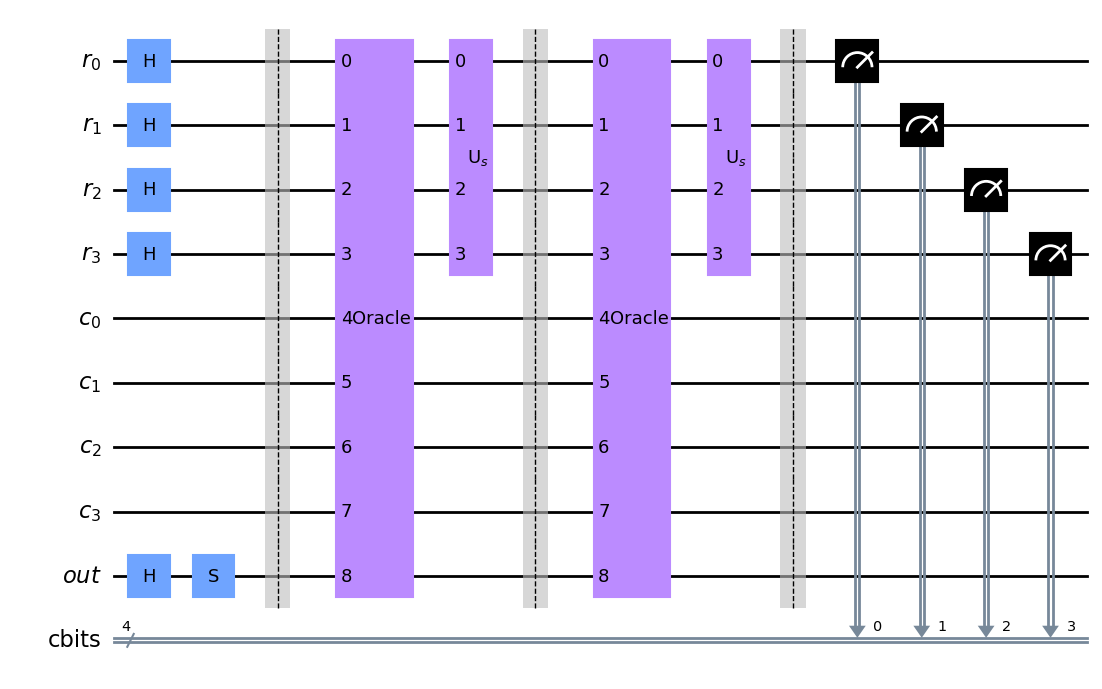

In [1]:
from qiskit_grover import QiskitGrover

grover = QiskitGrover()
grover.Build()
qc = grover.qc

# qc = grover.Oracle()

qc.draw(output="mpl")


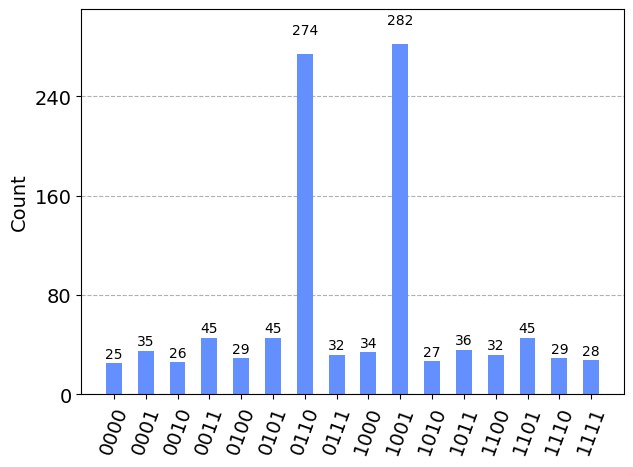

In [2]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
result = aer_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())

Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


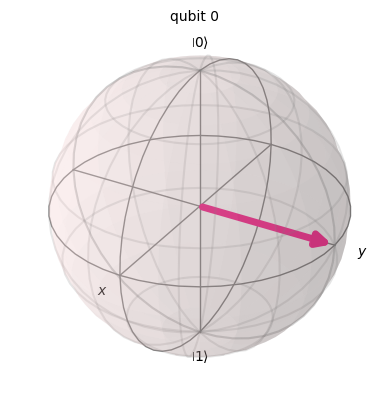

In [5]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit
qc = QuantumCircuit(1)

# Apply the Hadamard gate to initialize the qubit
qc.h(0)
qc.s(0)

# Simulate the circuit to visualize the state
simulator = Aer.get_backend('statevector_simulator')
job = simulator.run(transpile(qc, simulator))
result = job.result()

# Get and plot the final state vector
state_vector = result.get_statevector()
print(state_vector)

# Plot the Bloch vector representation
plot_bloch_multivector(state_vector)